<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/EX%205%266.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The shape of our dataset is: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38
We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


<ipython-input-12-aa78220c18fb>:76: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(groupby_invoice['productsNumber'],ax=ax)


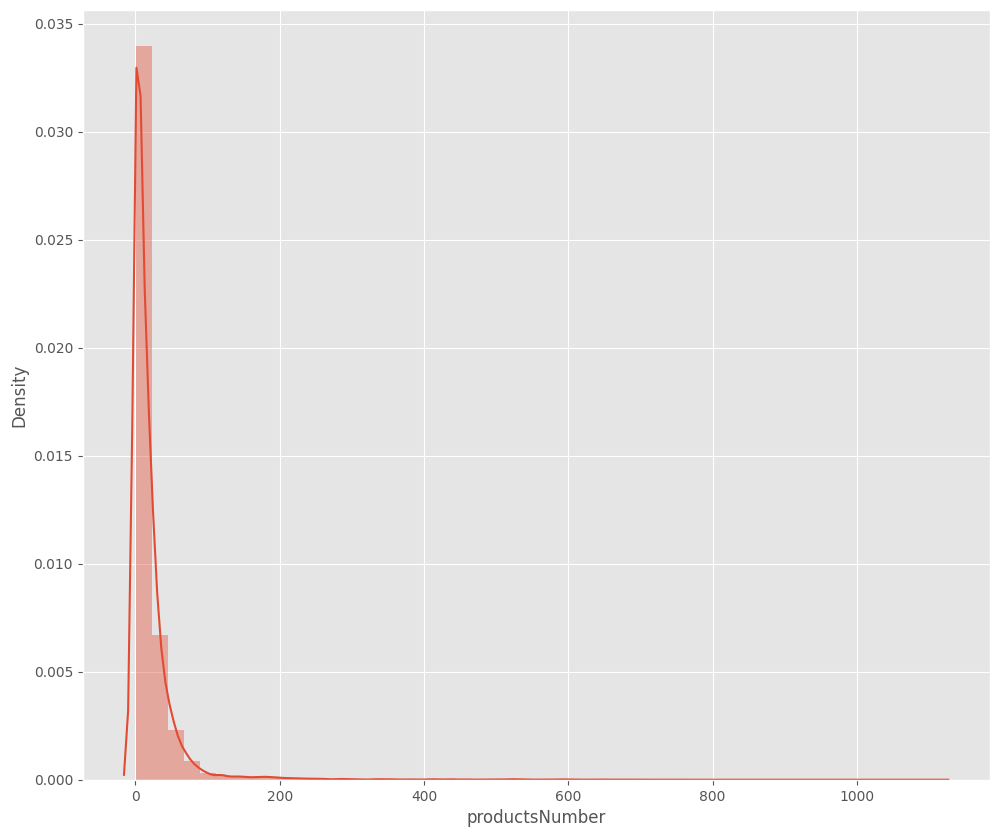

<ipython-input-12-aa78220c18fb>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")


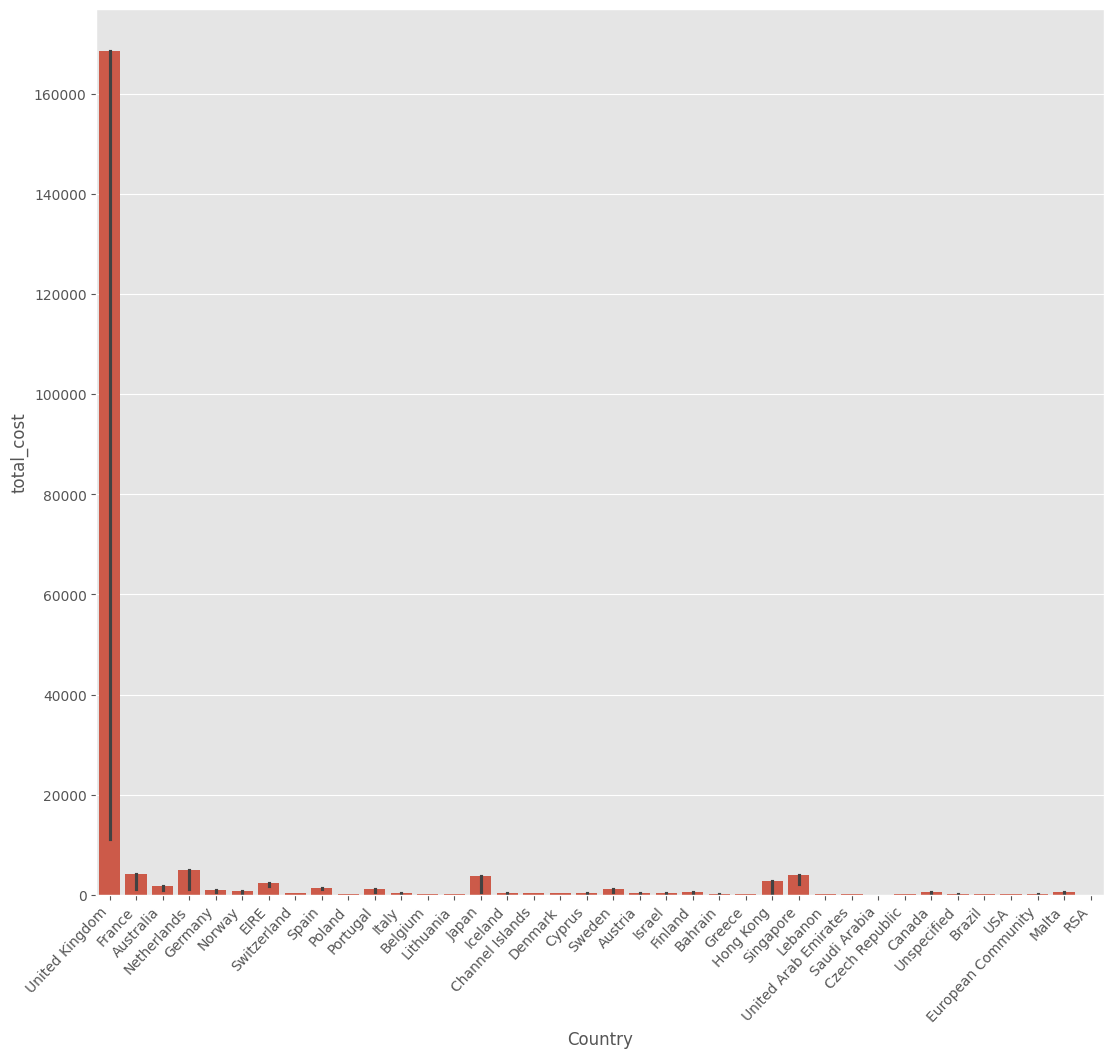

<ipython-input-12-aa78220c18fb>:94: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)


Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  26.96 %
Number of countries:  1


,InvoiceNo,Quantity
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


In [12]:
#EX 5
#GURRAM VAMSI_9921005149
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
retail_df = pd.read_excel("Online Retail.xlsx")
print("The shape of our dataset is:", retail_df.shape)
retail_df.head(10)
retail_df.tail(10)
retail_df.info()
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products: ",retail_df['StockCode'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() *100 / len(retail_df),2),"%" )
print('Number of countries: ',retail_df['Country'].nunique())
retail_df.describe()
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()
cancelled_orders[cancelled_orders['Quantity']==-80995]
cancelled_orders[cancelled_orders['Quantity']>0]
print("We have ",len(cancelled_orders), " cancelled orders.")
total_orders = retail_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number,total_orders, cancelled_number/total_orders*100))
groupby_customers = pd.DataFrame(retail_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()
groupby_customers.describe()
groupby_invoice = pd.DataFrame(retail_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()
groupby_invoice.describe()
retail_df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()
temp_df=retail_df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()
#GURRAM VAMSI _9921005149
transaction_df.describe()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(groupby_invoice['productsNumber'],ax=ax)
plt.show()
retail_df['total_cost'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='total_cost',data=retail_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()
retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)
retail_df[retail_df['Country']=='United Kingdom']['CustomerID'].nunique()
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.describe()
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() *100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country'].nunique())
groupedProduct = retail_uk.groupby('StockCode',as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)
invoice_quantity= retail_uk.groupby('InvoiceNo',as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()


In [13]:
# GURRAM VAMSI_9921005149

import platform
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import get_file
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda, Reshape

def plot_series(series, y_true, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    """Plot a time series with actual and predicted future values"""
    plt.plot(series, ".-", label="Inputs")
    n_steps = series.shape[0]

    # Calculate the number of steps ahead (= number of future values)
    n_steps_ahead = 1
    if not np.isscalar(y_true):
        n_steps_ahead = y_true.shape[0]

    plt.plot(np.arange(n_steps, n_steps + n_steps_ahead), y_true, "ro-", label="Labels")

    if y_pred is not None:
        plt.plot(np.arange(n_steps, n_steps + n_steps_ahead), y_pred, "bx-", label="Predicted", markersize=10)

    if x_label:
        plt.xlabel(x_label, fontsize=16)

    if y_label:
        plt.ylabel(y_label, fontsize=16)

    plt.legend(fontsize=14)

def plot_loss(history):
    """Plot training loss for a Keras model"""
    loss = history.history["loss"]
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, ".--", label="Training loss")
    final_loss = loss[-1]
    title = "Training loss: {:.4f}".format(final_loss)

    if "val_loss" in history.history:
        val_loss = history.history["val_loss"]
        plt.plot(epochs, val_loss, "o-", label="Validation loss")
        final_val_loss = val_loss[-1]
        title += ", Validation loss: {:.4f}".format(final_val_loss)

    plt.title(title)
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()

# Step 1: loading the data
zip_path = get_file(
    origin="https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip",
    fname="household_power_consumption.zip",
    extract=True,
)
file_path, _ = os.path.splitext(zip_path)
file_path += ".txt"
print(f"Dataset extracted at {file_path}")

df_power = pd.read_csv(
    file_path,
    sep=";",
    parse_dates={"Date_time": ["Date", "Time"]},
    infer_datetime_format=True,
    low_memory=False,
    na_values=["?"],
    index_col="Date_time",
)
print(f"df_power: {df_power.shape}")

# Step 2: exploring the data
# (Your code for exploring the data can go here)

# Step 3: preparing the data
def find_missing_values(df):
    total_missing = df.isnull().sum()
    percent_missing = (total_missing * 100 / df.isnull().count()).sort_values(ascending=False)
    return pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percent"])

def fill_na(df):
    n_features = df.shape[1]
    for j in range(0, n_features):
        df.iloc[:, j] = df.iloc[:, j].fillna(df.iloc[:, j].mean())
    return df

df_power = fill_na(df_power)
print(find_missing_values(df_power).head(n=10))

df_power = df_power.resample("h").mean()
print(f"df_power: {df_power.shape}")

# (Your code for plotting features can go here)

# Question: Split the dataset using (70%, 20%, 10%) ratios.
n_samples = len(df_power)

df_train = df_power[:int(0.7 * n_samples)]
df_val = df_power[int(0.7 * n_samples):int(0.9 * n_samples)]
df_test = df_power[int(0.9 * n_samples):]

print(f"df_train: {df_train.shape}")
print(f"df_val: {df_val.shape}")
print(f"df_test: {df_test.shape}")

# GURRAM VAMSI 9921005149

# Question: Standardize the splitted sets.
train_mean = df_train.mean()
train_std = df_train.std()

df_train_std = (df_train - train_mean) / train_std
df_val_std = (df_val - train_mean) / train_std
df_test_std = (df_test - train_mean) / train_std

def split_into_windows(data, n_steps_before, n_steps_ahead):
    x, y = [], []
    for i in range(len(data) - n_steps_before - n_steps_ahead + 1):
        x_window = data[i:i + n_steps_before]
        y_window = data[i + n_steps_before:i + n_steps_before + n_steps_ahead]
        x.append(x_window)
        y.append(y_window)
    return np.array(x), np.array(y)

n_steps_ahead = 1
n_steps_before = 10
x_val, y_val = split_into_windows(df_val_std.values, n_steps_before, n_steps_ahead)

# Naïve forecasting
y_pred_naive = np.tile(df_val_std.values[-1:, :], (n_steps_ahead, 1))
print(f"y_pred_naive: {y_pred_naive.shape}")
print(f"Naïve predictor MSE: {np.mean(mean_squared_error(y_val, y_pred_naive)):0.05f}")

# (Your code for plotting Naïve forecasting can go here)

# Dense network
dense_model = Sequential([
    Lambda(lambda x: x[:, -1:, :]),
    Dense(units=512, activation="relu"),
    Dense(units=n_steps_ahead * df_train_std.shape[1], kernel_initializer=tf.initializers.zeros()),
    Reshape([n_steps_ahead, df_train_std.shape[1]])
])

def train(model, x_train, y_train, x_val, y_val):
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_val, y_val))
    return history

x_train, y_train = split_into_windows(df_train_std.values, n_steps_before, n_steps_ahead)
x_val, y_val = split_into_windows(df_val_std.values, n_steps_before, n_steps_ahead)
x_test, y_test = split_into_windows(df_test_std.values, n_steps_before, n_steps_ahead)

print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_val: {x_val.shape}, y_val: {y_val.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

def plot_features(series, labels, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-", label="Inputs")
    n_steps = series.shape[0]

    plt.plot(np.arange(n_steps, n_steps + len(labels)), labels, "ro-", label="Labels")

    if x_label:
        plt.xlabel(x_label, fontsize=16)

    if y_label:
        plt.ylabel(y_label, fontsize=16)

    plt.legend(fontsize=14)
    plt.show()

# Now you can use plot_features
plot_features(x_val[-1], y_val[-1])


n_steps_ahead = 1
n_steps_before = 10
x_val, y_val = split_into_windows(df_val_std.values, n_steps_before, n_steps_ahead)

# Naïve forecasting
y_pred_naive = np.tile(df_val_std.values[-1:, :], (n_steps_ahead, 1))
print(f"y_pred_naive: {y_pred_naive.shape}")
print(f"Naïve predictor MSE: {np.mean(mean_squared_error(y_val, y_pred_naive)):0.05f}")

# Dense network
dense_model = Sequential([
    Lambda(lambda x: x[:, -1:, :]),
    Dense(units=512, activation="relu"),
    Dense(units=n_steps_ahead * df_train_std.shape[1], kernel_initializer=tf.initializers.zeros()),
    Reshape([n_steps_ahead, df_train_std.shape[1]])
])
n_epochs = 10
history = train(dense_model, x_train, y_train, x_val, y_val)
plot_loss(history)
y_pred_dense = dense_model.predict(x_val)
print(f"Dense network MSE: {np.mean(mean_squared_error(y_val, y_pred_dense)):0.05f}")

# GURRAM VAMSI_9921005149


   8192/Unknown - 0s 0us/stepDataset extracted at /root/.keras/datasets/household_power_consumption.txt
df_power: (2075259, 7)
                       Total  Percent
Global_active_power        0      0.0
Global_reactive_power      0      0.0
Voltage                    0      0.0
Global_intensity           0      0.0
Sub_metering_1             0      0.0
Sub_metering_2             0      0.0
Sub_metering_3             0      0.0
df_power: (34589, 7)
df_train: (24212, 7)
df_val: (6918, 7)
df_test: (3459, 7)
y_pred_naive: (1, 7)


NotImplementedError: Cannot convert a symbolic tf.Tensor (Mean_2:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.